In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
mean = [5, -0.5, 17]
cov = [[4,0.5,0],[0.5,5,-0.2],[0,-0.2,2]]
sample_size = 1000

In [48]:
dataset = pd.DataFrame(
    np.random.multivariate_normal(
        mean=mean,
        cov=cov,
        size=sample_size
    ),
    columns=["dimension_1","dimension_2","dimension_3"]
)
dataset.cov()

,dimension_1,dimension_2,dimension_3
dimension_1,3.675918,0.404730,0.019704
dimension_2,0.404730,5.221268,-0.143973
dimension_3,0.019704,-0.143973,1.931973


In [49]:
dataset.describe()

,dimension_1,dimension_2,dimension_3
count,1000.000000,1000.000000,1000.000000
mean,4.938153,-0.409141,16.986467
std,1.917268,2.285009,1.389954
min,-2.679564,-7.198639,12.635494
25%,3.682310,-1.951779,16.053749
50%,4.947761,-0.439430,16.905143
75%,6.184851,1.194976,17.925403
max,11.645282,7.139219,21.541006


<Axes: xlabel='dimension_1', ylabel='dimension_3'>

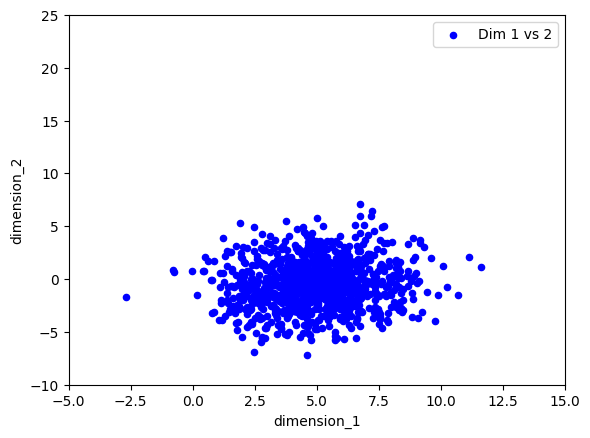

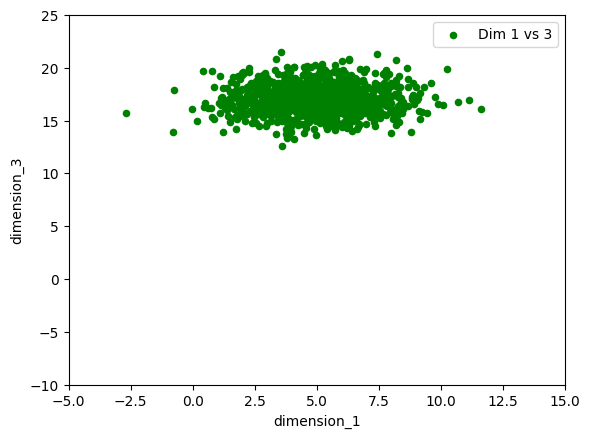

In [70]:
ax = dataset.plot.scatter(
    x="dimension_1",
    y="dimension_2",
    label="Dim 1 vs 2",
    color="blue",
    xlim = [-5,15],
    ylim=[-10,25]
)
dataset.plot.scatter(
    x="dimension_1",
    y="dimension_3",
    label="Dim 1 vs 3",
    color="green",
    xlim = [-5,15],
    ylim=[-10,25]
)

In [73]:
trace = np.trace(cov)

print(f"trace of Sigma: {trace}")

trace of Sigma: 11.0


In [79]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

Text(0.5, 0, 'values')

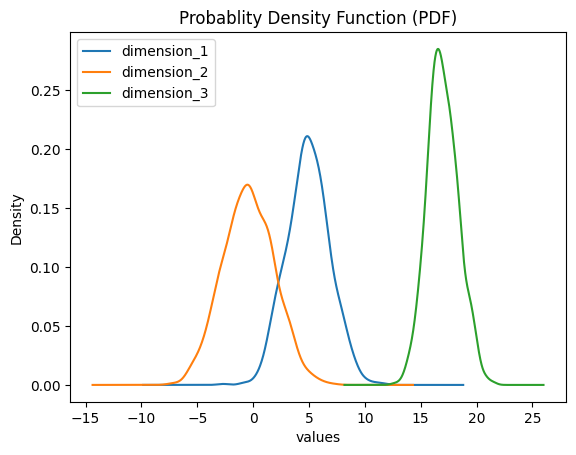

In [84]:
ax = dataset.plot.kde(
    title="Probablity Density Function (PDF)"
)
ax.set_xlabel("values")

Text(0.5, 1.0, 'Cumulative Distribution Function (CDF)')

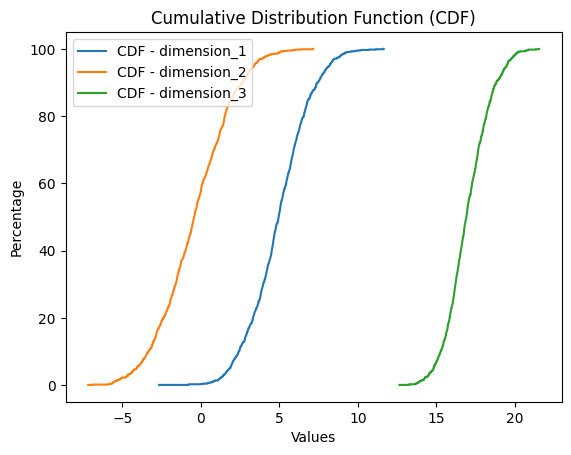

In [174]:
for i in range(1,4):
    count, bins_count = np.histogram(dataset[f'dimension_{i}'], bins=1000)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(
        bins_count[1:], 
        cdf*100,
        label=f"CDF - dimension_{i}"
        )
    
plt.legend(loc="upper left")
plt.ylabel("Percentage")
plt.xlabel("Values")
plt.title("Cumulative Distribution Function (CDF)")